## Banking Dataset - Análise exploratória

Os depósitos a prazo representam uma importante fonte de receita para os bancos. Trata-se de um investimento em dinheiro retido em uma instituição financeira, onde o montante é investido por um período fixo, a uma taxa de juros previamente acordada. Para maximizar a captação desses depósitos, os bancos implementam diversas estratégias de marketing direto, incluindo marketing por e-mail, publicidade, telemarketing e marketing digital.

Dentre essas estratégias, o telemarketing continua sendo um dos métodos mais eficazes para alcançar os clientes. No entanto, essa abordagem exige um grande investimento, pois grandes centrais de atendimento são contratadas para executar essas campanhas. Portanto, é crucial identificar previamente os clientes com maior probabilidade de conversão, de modo que possam ser especificamente alvo dessas campanhas.

Este notebook focará na análise exploratória dos dados relacionados às campanhas de marketing direto (chamadas telefônicas) de uma instituição bancária portuguesa.

Nas seções seguintes, exploraremos os dados disponíveis, realizaremos a limpeza e o pré-processamento necessários e, finalmente, analisaremos diversas características dos clientes para identificar padrões que impactam a chance de um cliente efetuar o depósito, mensurado pela nossa variável resposta _y_. 

A fonte dos dados é [_Banking Dataset - Marketing Targets_](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets) do Kaggle.

# Índice

TO_DO

1. [Introdução](#1)
    1. [Configurações e bibliotecas](#1_1)
    1. [Conversão de CSV para Parquet](#1_2)
    1. [Sumarização](#1_3)
    1. [Dicionário de dados](#1_4)
1. [Variável resposta](#2)

# <a id='1'></a> 1. Introdução

TO_DO

## <a id='1_0'></a> 1.0 Configurações e bibliotecas

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary

## <a id='1_1'></a> 1.1 Conversão de CSV para Parquet

O conjunto de dados original está dividido em dois arquivos de formato CSV: `train.csv` e `test.csv`. 
Converteremos os arquivos CSV para Parquet para tirar proveito de sua eficiência no armazenamento, leitura eficiente e melhor desempenho em consultas. Vamos manter os originais na pasta `data/raw` e os convertidos na pasta `data/bronze`.

Nossa análise exploratória será feita usando apenas dados do conjunto de treino. Esse conjunto de dados conta com 45221 observações e 16 variáveis explicativas além da variável resposta.

In [5]:
# Leitura dos dados em CSV
raw_banking_train = pd.read_csv('../data/raw/train.csv', sep = ';')
raw_banking_test = pd.read_csv('../data/raw/train.csv', sep = ';')

# Convertendo para Parquet na camada bronze
raw_banking_train.to_parquet('../data/bronze/banking_train.parquet')
raw_banking_test.to_parquet('../data/bronze/banking_test.parquet')

# Lendo os dados convertidos
bronze_train = pd.read_parquet('../data/bronze/banking_train.parquet')

# Visualizando algumas informações sobre nossos dados
print(bronze_train.shape)
bronze_train.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## <a id='1_2'></a> 1.2 Sumarização

Vamos fazer uma análise preliminar dos dados. Abordaremos os dados em mais detalhes nas seções seguintes.
Observamos que não há dados faltantes em nosso conjunto de dados.

- **age:** A idade dos clientes varia de 18 a 95 anos, com uma média de aproximadamente 41 anos e um desvio padrão de 10,6 anos. A distribuição apresenta uma assimetria à direita.
- **job:** Esta é uma variável categórica que representa o tipo de trabalho do cliente. A maioria dos clientes são "blue-collar" (21,5%), "management" (20,9%) ou "technician" (16,8%).
- **marital:** Outra variável categórica, indicando o estado civil. A maioria dos clientes é casada (60,2%), seguidos por solteiros (28,3%) e divorciados (11,5%).
- **education:** O nível de educação dos clientes, sendo a maioria com ensino secundário (51,3%) ou terciário (29,4%).
- **default:** Uma variável binária indicando se o cliente tem crédito em situação de default. A grande maioria (98,2%) não está em default.
- **balance:** O saldo médio anual dos clientes, variando de -8.02 a 102.13 euros, com uma média de 1.37 euros e um desvio padrão alto de 3.04 euros.
- **housing e loan:** Variáveis binárias indicando se o cliente tem empréstimo imobiliário ou pessoal, respectivamente. A maioria tem empréstimo imobiliário (55,6%) e não tem empréstimo pessoal (84%).
- **contact:** O tipo de comunicação usado para contatar o cliente, sendo a maioria por celular (64,8%).
- **day e month:** O dia e mês do último contato, com uma distribuição multimodal para os dias.
- **duration:** A duração do último contato, em segundos, variando de 0 a 4918 segundos, com uma média de 258 segundos (aproximadamente 4 minutos).
- **campaign:** O número de contatos realizados na campanha atual, variando de 1 a 63, com uma média de aproximadamente 3 contatos.
- **pdays:** O número de dias desde o último contato de uma campanha anterior, com muitos clientes sendo contatados pela primeira vez (-1). Essa á uma  variável mista, pois temos a combinação da informação de uma variável numérica discreta com uma variável categórica binária. Para critérios de análise, vamos dividir essa variável em duas: **pdays_num** e **pdays_cat**. Observando *pdays_cat*, observamos que a maioria dos clientes (88,3%) não tiveram contato anterior.
- **previous:** O número de contatos realizados antes da campanha atual, com a maioria dos clientes (88,3%) não tendo sido contatada anteriormente.
- **poutcome:** O resultado da campanha de marketing anterior, sendo a maioria "unknown" (81,7%), seguido por "failure" (10,8%).
- **y:** Nossa variável resposta. Indica se o cliente fez um depósito a prazo. A maioria (88,3%) não fez o depósito.

In [33]:
# Separando a componente categórica nominal e a componente numérica discreta da variável mista 'pdays'
bronze_train['pdays_cat'] = bronze_train['pdays'].apply(lambda x: True if x > 0 else False)
bronze_train['pdays_num'] = bronze_train['pdays'].apply(lambda x: x if x > 0 else 0)

dfSummary(bronze_train)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 40.9 (10.6)min < med < max:18.0 < 39.0 < 95.0IQR (CV) : 15.0 (3.9),77 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC+UlEQVR4nO3dPU/bUBSA4XMTEjkhuo6VFrYsHTIgdWDM0n/Aj+3ajYEdKWuGKhsCnKC4mDi2O7VLIeBru/Gx3me/5g6vDAd/mTzPBWi6zrE3AHzEybE3cIgxZiAifcfluzzPn6vcD46nsaEaYwaTyeTKWhu4rH96egqNMd+JtR0aG6qI9K21wXw+f/Z9Py6ycLPZeDc3N8HDw0NfRAi1BZocqoiI+L4fn52d/XJYOqh8MzgahimoQKhQodZf/SWndptlWa/K/UCv2kItO7UnSeKlaXoRx/G1iLj8jYoWqfOM6jy1i4isVqtgsVgM9/t9t47NQZfap37XqT0MQ6Z2/MUwBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCo1/XNpVmqY9EbHGGNdD8KaVBmllqFEU9ZIk+TqdTrvdbrfwYzAivGmlaVoZ6m63O/E8b3h5eRmfn5+HRdfzppXmaWWof5yenrq+ZUWEN600CsMUVGj1GbWMksMYg1jFCPUVZYcxBrHqEeorygxjDGL1INQDSgxjDGIVY5iCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKEC96PWgMdYqkeoFeMxlnoQasV4jKUehFoTHmOpFsMUVCBUqECoUIFQoQKhQgVChQrv/nvKGDMQkb7DsW2WZT2HdcA/DoZqjBlMJpMra21Q9MBJknhpml7EcXwtIq7vKAVE5P0zat9aG8zn82ff9wtdDlytVsFisRju9/tuif0BIvLBK1O+7xe+yhKGIVdYUBmGKajAtf6GqeCzQx0RyRzXNvYWQ0JtkLK3CKZp2oui6MtoNFp2Op2k6Pr1er01xvwQEadPHkmNoX8o1M1m4xU98Ha79UREoijy7u7uhv9zvdaf/fj4OPI8bzibzcx4PH4pslZE5P7+3lsul59ns9nP8Xi8LbJ2vV6Pbm9vv02n00+u3+YqGfpLnudvrvsNWZ5IF7PWZn0AAAAASUVORK5CYII="">",0(0.0%)
2,job[object],1. blue-collar2. management3. technician4. admin.5. services6. retired7. self-employed8. entrepreneur9. unemployed10. housemaid11. other,"9,732 (21.5%)9,458 (20.9%)7,597 (16.8%)5,171 (11.4%)4,154 (9.2%)2,264 (5.0%)1,579 (3.5%)1,487 (3.3%)1,303 (2.9%)1,240 (2.7%)1,226 (2.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD/UlEQVR4nO3cTW7TUABG0RcUIZgkqip1MV0Ei2UR2U1V1QNATMKAEWrpT2pfI3zOBurB1Ytsva+78/k8oPBh7QdgO8RGRmxkxEZGbGTERkZsZMRGRmxkdmOMz2OMjys/x8/z+fx95WdgYfvr6+svh8Phas2HmKbpfrfbfRXc/21/OByubm9vvx+Pxx9rPMDDw8On0+l0dXd393GMIbb/2H6MMY7H44+bm5tvKz7H5xX/NhEvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY/xu87ZWs9wJp/m9Z+mqb70+l0NVa8UzZN0/0Y4+daf5+GDQKZnX+ZReVfONmcahux+rrKsmo7Vl1XWVZty7+wrrKs2ggfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MisOngxdtmW1Qcvxi7b4Vo4GYMXMuXJ5gTbuGzwYthCMngxbGGMdvBi2LJxPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRSQYvhi2MEQ5eDFtwLZyMwQsZLwhk5vwZ9TPJs2ZbV1lP8ZJZ1lXWU7zGnOsq6yme5QWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzCzrKuspXmO2dZX1FC9xLZyMdRWZ95xsTjLe5OLBi4ELb3XR4MXAhUu8Z/Bi4MKb+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5qLBi4ELl7h48GLgwlu5Fk7G4IXMa042JxizeHHwYtjCXJ4dvBi2MKfXDF4MW5iFj7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm2XWVFRVzenFdZUXFXGwQyFhXkfnbyeY0Y3ZPrqssqljCo3WVRRVL+du6yqKK2fmoS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERubR4MXIhaU8OXgxcmEJroWTMXgh42QjY/BCxuCFjMELGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNaOBmDFzJeEMg89TPqJ5RFPFpXWVaxlD/WVZZVLOmpdZVlFYvwgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmj3WVZRVLerSusqxiKa6Fk7GuIuNkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWjgZgxcyTjYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IeMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNzC/IeU7iNeCxFgAAAABJRU5ErkJggg=="">",0(0.0%)
3,marital[object],1. married2. single3. divorced,"27,214 (60.2%)12,790 (28.3%)5,207 (11.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQWrCUBRG4ZsSpE4SguBiXEQX20VkNyK+gYqTdNBpqQ7Cebzc863gIgclwb9bliUkwkftA5RHFxH7iNjVPiSZ57Is99pH0PrD4fA1DMNU+5BMSimXruu+swXXD8MwnU6n+ziOj9rHZHC9Xj/neZ7O5/MuInLFFhExjuPjeDzeah+TyL72ATX4gCCMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQnTR/z+x6r2IVlk/qz7Usplnucpkv7HqoZSyiUinrXvoLlBqCPlBqFzyidKi99sKb8VtqC5dVXWZdIWNLWuyrxM2oIW11U+NTfKl7rCGJswxiaMsQljbMIYmzDGJoy

# <a id='1_3'></a> 1.3 Dicionário de dados

A seguir, um resumo conciso da discussão da seção anterior em formato tabular para referência futura. 

| Variável  | Tipo de Variável   | Descrição                                                |
|-----------|--------------------|----------------------------------------------------------|
| age       | Numérica Discreta  | Idade do cliente (18 a 95 anos).                         |
| job       | Categórica Nominal | Tipo de trabalho do cliente (11 categorias).             |
| marital   | Categórica Nominal | Estado civil do cliente (3 categorias).                  |
| education | Categórica Ordinal | Nível de educação do cliente (4 categorias).             |
| default   | Categórica Binária | Cliente tem (yes) ou não (no) crédito em default.        |
| balance   | Numérica Contínua  | Saldo anual médio, em euros (-8.019 a 102.127).          |
| housing   | Categórica Binária | Cliente tem (yes) ou não (no) empréstimo imobiliário.    |
| loan      | Categórica Binária | Cliente tem (yes) ou não (no) empréstimo pessoal.        |
| contact   | Categórica Nominal | Tipo de comunicação de contato (3 categorias).           |
| day       | Categórica Ordinal | Dia do último contato (1 a 31).                          |
| month     | Categórica Ordinal | Mês do último contato (12 categorias).                   |
| duration  | Numérica Contínua  | Duração do último contato, em segundos (0 a 4.918).      |
| campaign  | Numérica Discreta  | Número de contatos na campanha atual (1 a 63).           |
| pdays     | Mista              | Dias desde o último contato (-1 a 871).                  |
| previous  | Numérica Discreta  | Número de contatos antes da campanha atual (0 a 275).    |
| poutcome  | Categórica Nominal | Resultado da campanha anterior (4 categorias).           |
| y         | Categórica Binária | Cliente fez (yes) ou não (no) um depósito a prazo.       |

# <a id='2'></a> 2. Análise univariada

TO_DO

## <a id='2.1'></a> 2.1 Variável resposta *y*

A partir dos resultados, podemos observar que:

- A variável resposta y é binária, indicando se o cliente fez (yes) ou não (no) um depósito a prazo.
- A classe majoritária é no, com 39.922 instâncias (88,3% dos dados).
- A classe minoritária é yes, com 5.289 instâncias (11,7% dos dados).

Portanto, temos um conjunto de dados desbalanceado, com uma grande disparidade entre as classes. Isso será um aspecto importante a ser considerado durante a modelagem dos dados.

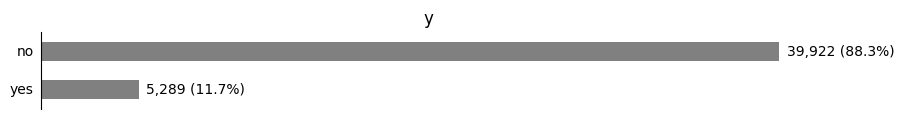

In [43]:
def grafico_barras(coluna, destaque=[]):
    """Cria gráfico de barras para variáveis categóricas com porcentagens."""
    # Contar as ocorrências de cada categoria na coluna especificada
    contagem = bronze_train[coluna].value_counts().sort_values(ascending=True)
    porcentagens = (contagem / contagem.sum() * 100).round(2)  # Calcular porcentagens e arredondar para 2 casas decimais

    altura = len(contagem) * 0.5  # Ajuste de altura baseado no número de categorias

    plt.figure(figsize=(10, altura))
    ax = contagem.plot(kind='barh', color=['navy' if i in destaque else 'gray' for i in range(len(contagem))])
    plt.title(coluna)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])

    # Definir offset para espaçamento dos textos
    max_value = contagem.max()
    offset = max_value * 0.01

    # Adicionar valores e porcentagens à direita de cada barra
    for index, (value, percent) in enumerate(zip(contagem, porcentagens)):
        ax.text(value + offset, index, f'{value:,.0f} ({percent}%)', va='center', ha='left')

    # Adicionar as categorias ao eixo y com espaçamento
    for index, category in enumerate(contagem.index):
        ax.text(-offset, index, category, va='center', ha='right', color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.spines['left'].set_visible(True)

grafico_barras('y')

## <a id='2.1'></a> 2.1 Variável resposta *y*